In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from glob import glob
from hydra import initialize, compose
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.lenses import lens_util
from mejiro.utils import util
from mejiro.plots import corner

In [4]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = False  # pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=True, verbose=True)

pipeline_dir='/data/bwedig/mejiro/pipeline'


100%|██████████| 14706/14706 [07:32<00:00, 32.49it/s] 


In [10]:
high_snr[10].uid

'00003190'

Count: 78
('snrs=[205.46702756982313, 200.7515354639043, 208.29983191381913, '
 '206.34562219532881, 357.22901217791724, 218.09766103016528, '
 '202.01789569814267, 206.74997302273468, 495.11394034462666, '
 '239.82906896010644, 218.04404855520912, 240.6618868691563, '
 '244.76850935662333, 251.22733280061078, 244.8935308702811, '
 '228.24314279953956, 210.28767948547093, 233.48262239022128, '
 '235.32943365450708, 218.89152022976313, 214.6445443004806, '
 '275.01766222040084, 209.22961341178242, 237.70013122109137, '
 '259.1319186764461, 233.1382973194921, 241.90808499557187, '
 '236.30178157277163, 290.7275649710626, 262.23771035362364, '
 '201.50328161087012, 203.61895297003855, 216.57605346934133, '
 '303.6305575660637, 209.83040656577631, 227.08641432559983, '
 '209.5409548807868, 250.0342101565311, 212.11298942062604, '
 '232.57511445657533, 255.263355397572, 249.79721486870517, '
 '210.36869291248448, 215.86122227259162, 208.84177348546066, '
 '208.72198208058936, 207.6727138452

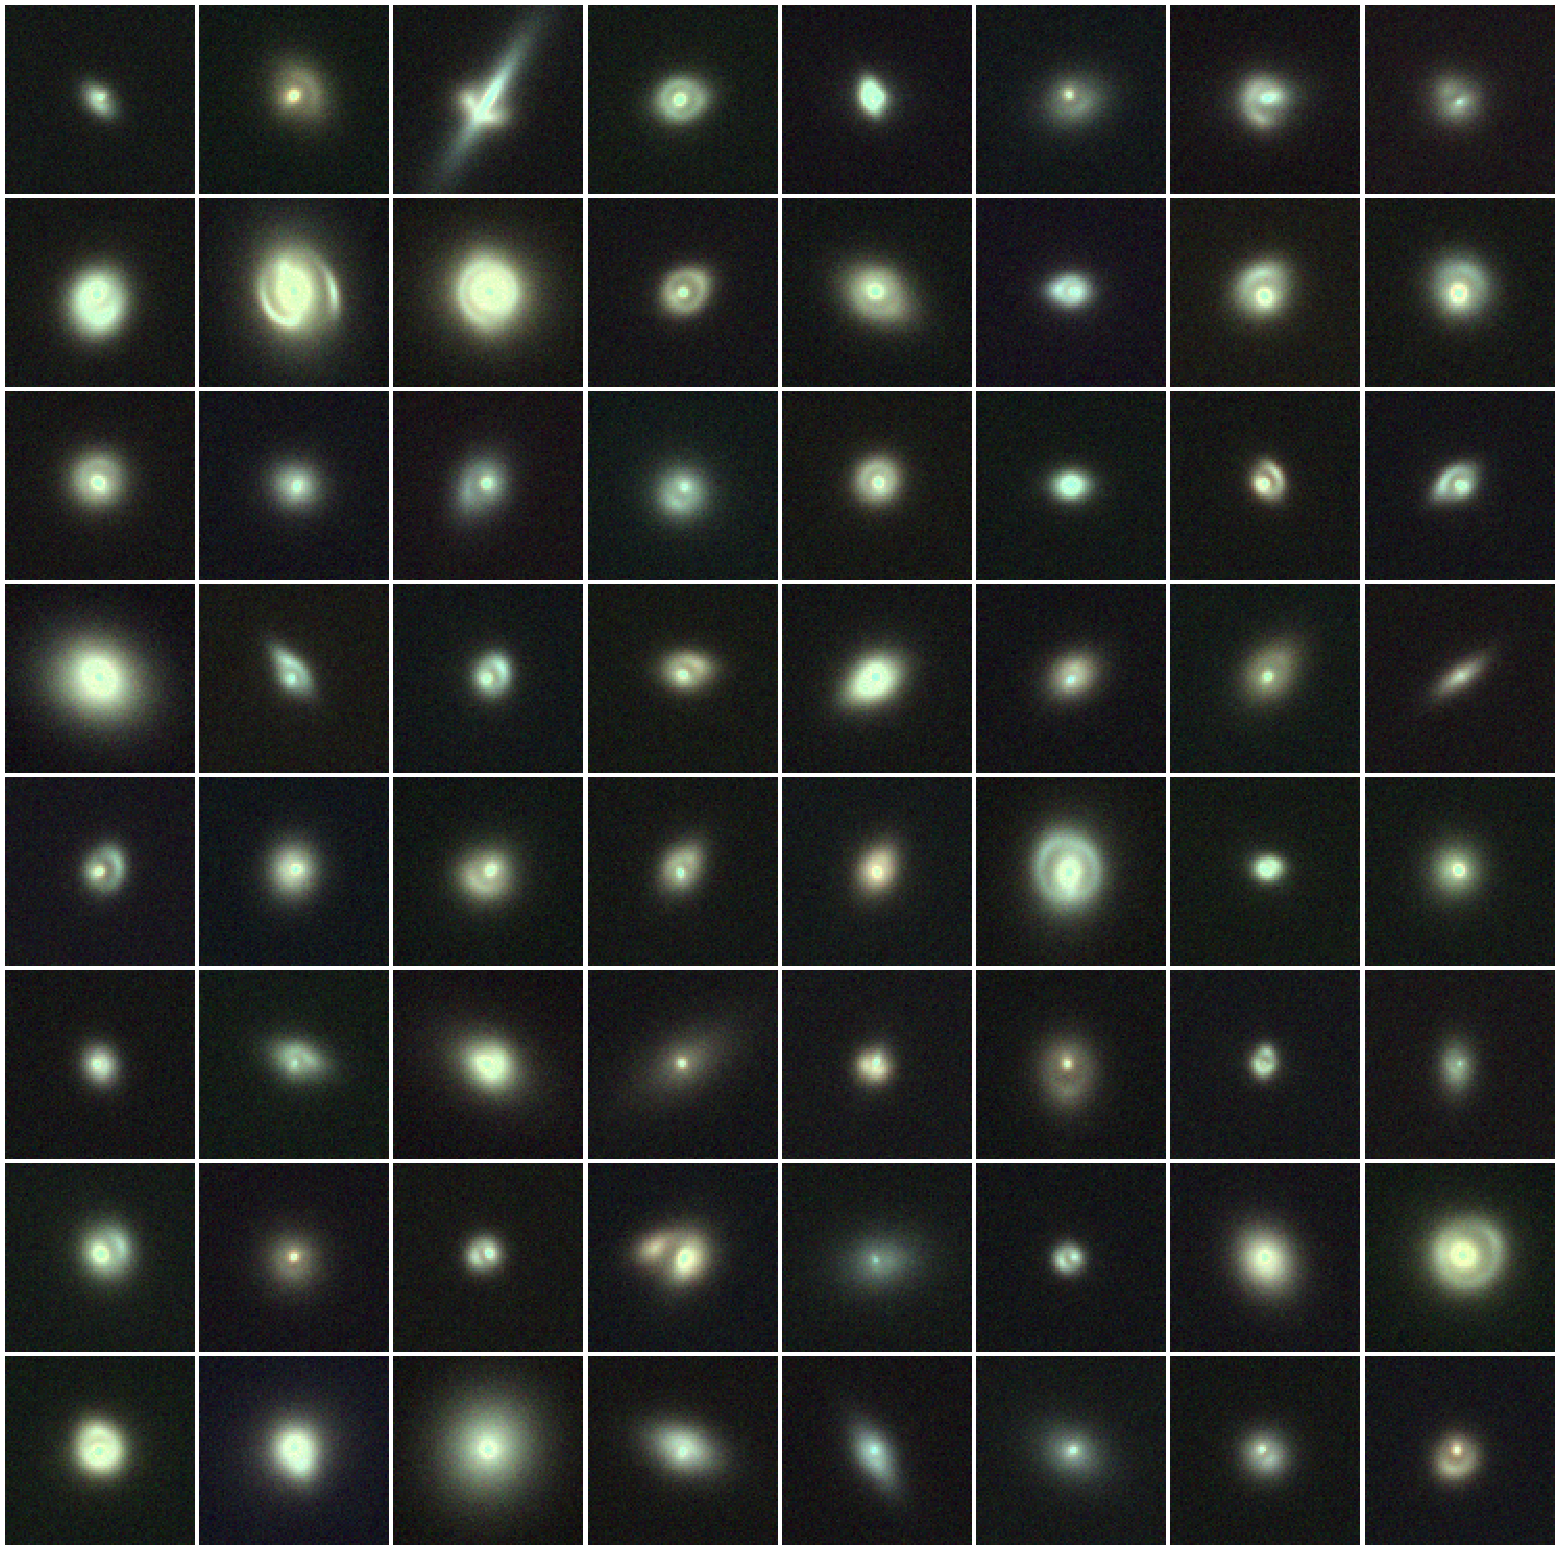

In [6]:
high_snr = [l for l in all_lenses if l.snr > 200]  #  and l.get_einstein_radius() > 0.5
print(f'Count: {len(high_snr)}')

uids = [l.uid for l in high_snr]
snrs = [l.snr for l in high_snr]
pprint(f'{snrs=}')

color = [lens_util.get_sample(pipeline_dir, index=uid, rgb_bands=pipeline_params['rgb_bands'], model=False)[2] for uid
         in uids]

plot.rgb_plot_grid(color, side=np.floor(np.sqrt(len(high_snr))).astype(int))

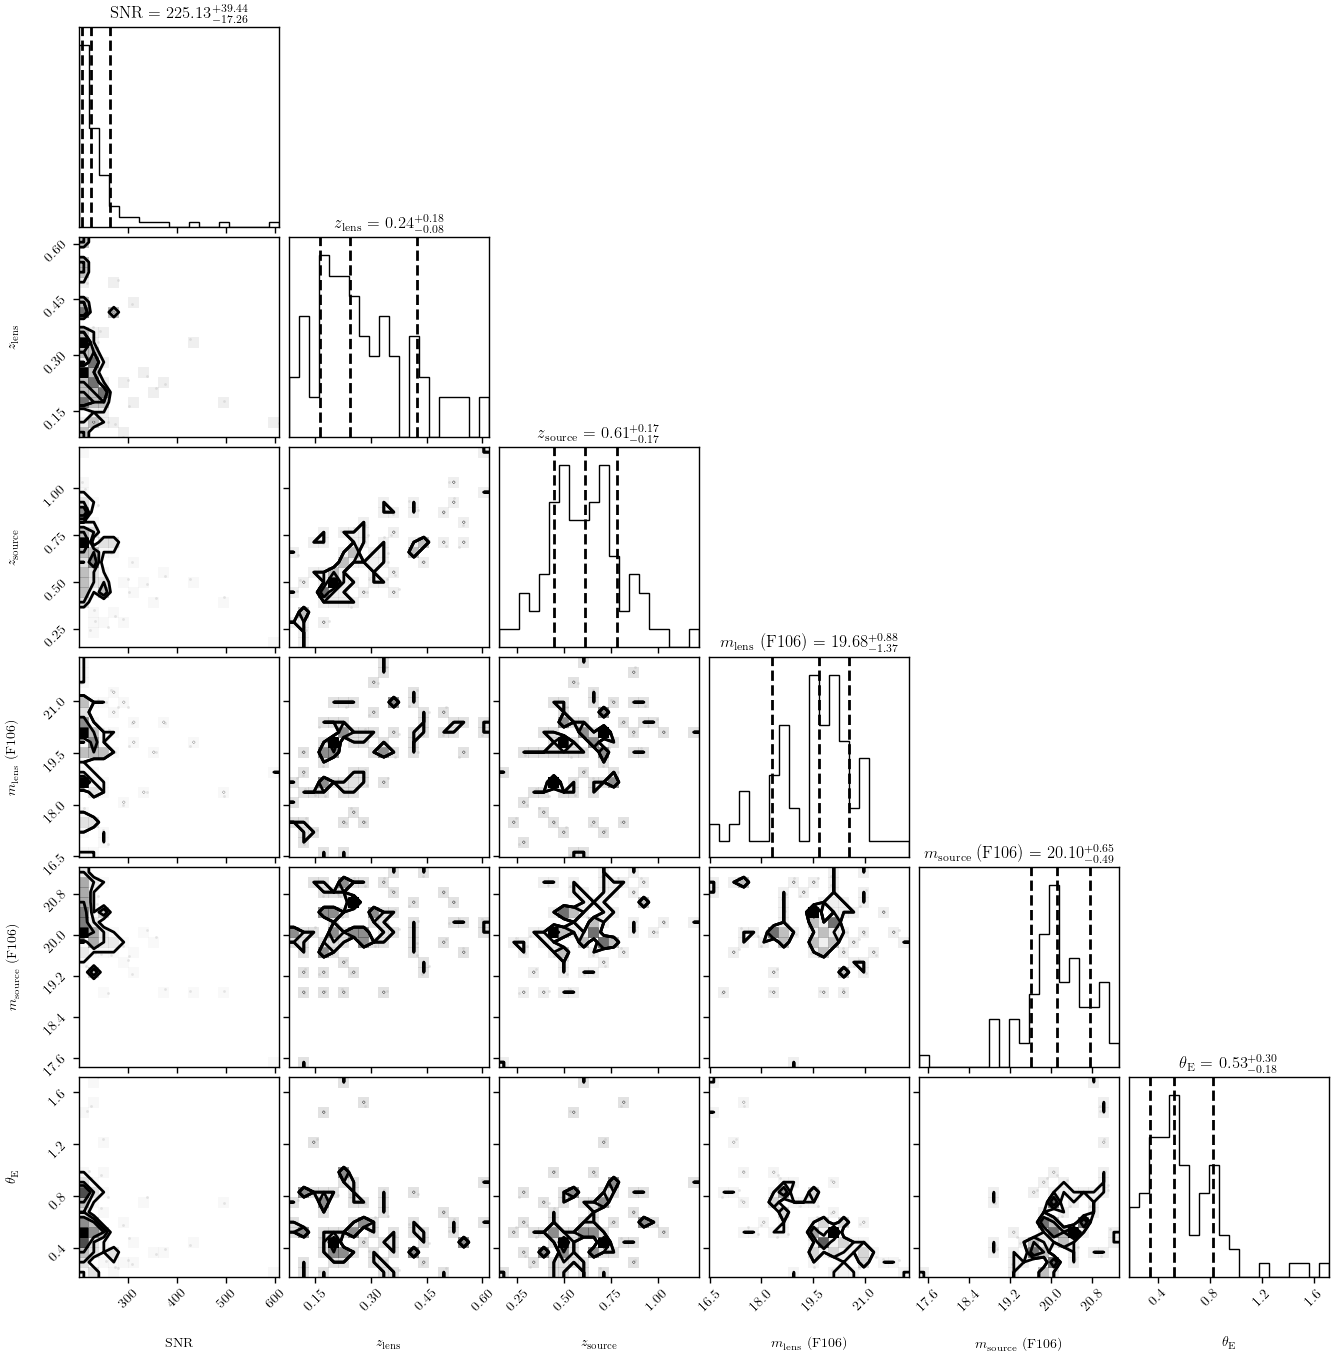

In [8]:
_ = corner.system(high_snr, band='F106')